**Accessing Databases with Python**

***Application Program Interface(API)***

API lets two pieces of software talk to each other. API/Your Python Program(Input) -> Data -> Other software component(output). E.g Your program & other software components

REST API - allows you communicate through the internet.They are used to interact with web services i.e. applications that you call through the internet. In REST API, your program is called the client.

RE - Representational 

S - State

T - Transfer

The have a set of Rules regarding:
1. Communication
2. Input or Request
3. Output or Response

Http methods are a way of transmitting data over the internet. We tell the REST API what to do by sending a request which is usually communicated via an http message. The instruction is then sent through a JSON file(like dictionary). The operation is transmitted through the web surface via the internet. The service performs the operation. The web surface then returns the response via an http msg where the information is returned via JSON file. This information is transmitted back to the client.

**Reading Data from relational Databases** 

In this lesson, you will learn how to read SQL queries and relational database tables into Dataframe objects using pandas. Also, we'll take a look at different techniques to persist the pandas Dataframe objects to database tables.

In [1]:
import pandas as pd

**Read data from SQL Database**

Reading data from SQL relational database is fairly simple and pandas support a variety of methods to deal with it.

We'll start with an example using SQLite, as it's a built-in Python package, and we dont need anything extra installed. 

In [2]:
import sqlite3

In order to work with a SQLite database from Python , we first have to connect to it. We can do that using the connect function, which returns a Connection object.

We'll use the following database structure:

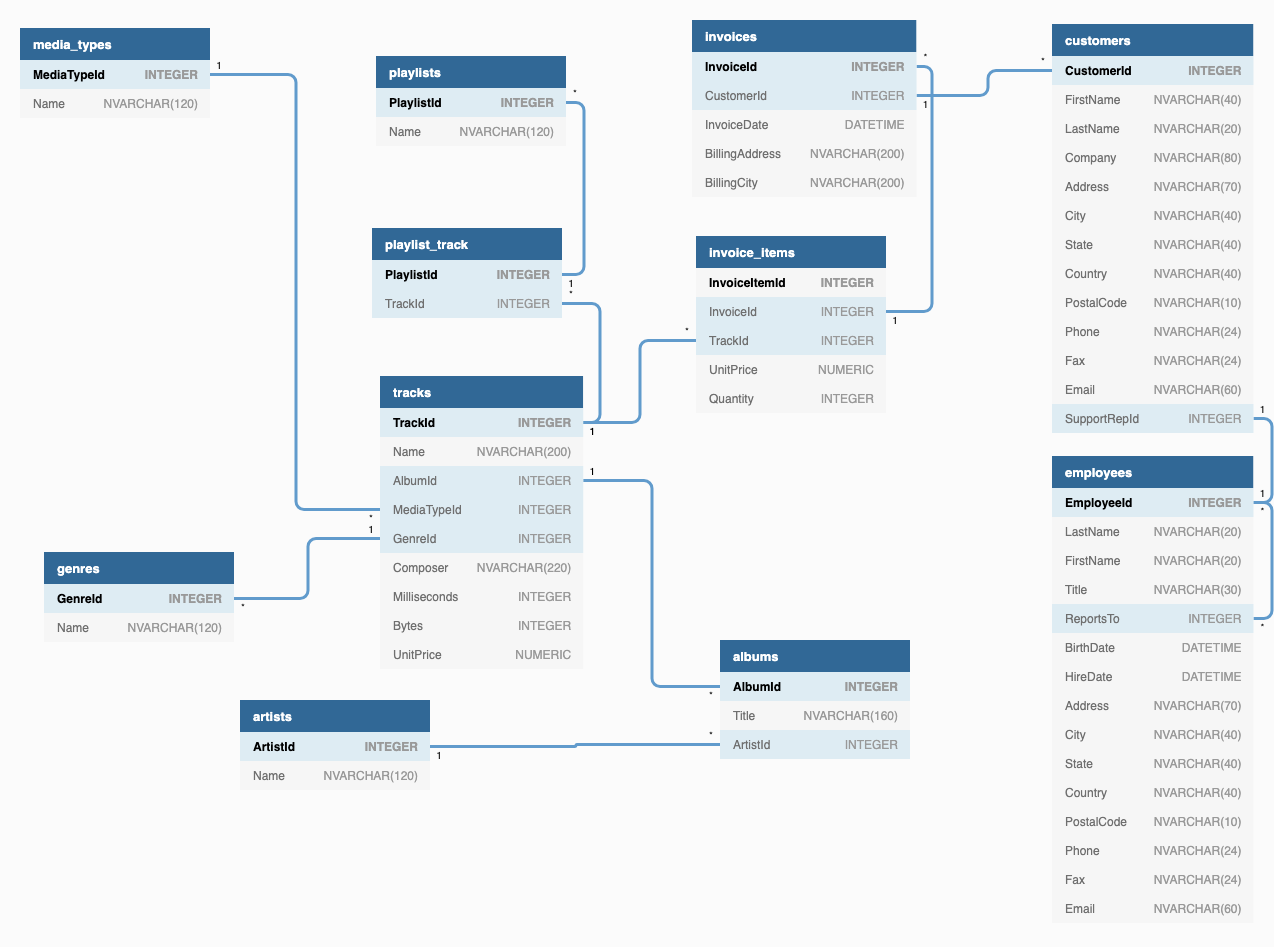

In [3]:
# Importing the packages for displaying images
from PIL import Image
import numpy as np
from IPython.display import display

im = Image.open('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\Chinook.png')
display(im)

In [4]:
# First step: Create a connection object to connect to the database
conn = sqlite3.connect('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\chinook.db')

Once we have a Connection object, we can then create a cursor object. Cursors allow us to execute SQL querries against a database.

In [5]:
# Second step: create the cursor object. A cursor is an object which helps to execute the query and fetch the records from the database. 
cur = conn.cursor()

The cursor created has a method execute. which will receive SQL parameters to run against the database.

The code below will fetch the first 5 rows from the employees table.

In [6]:
cur.execute('SELECT * FROM employees LIMIT 5;')

You may have noticed that we didn't assign the results of the above query to a variable. This is because we need to run another command to actually fetch the results.

We can use the fetchall method to fetch all o the results of a query:

In [7]:
results = cur.fetchall()

In [8]:
results

[(1,
  'Adams',
  'Andrew',
  'General Manager',
  None,
  '1962-02-18 00:00:00',
  '2002-08-14 00:00:00',
  '11120 Jasper Ave NW',
  'Edmonton',
  'AB',
  'Canada',
  'T5K 2N1',
  '+1 (780) 428-9482',
  '+1 (780) 428-3457',
  'andrew@chinookcorp.com'),
 (2,
  'Edwards',
  'Nancy',
  'Sales Manager',
  1,
  '1958-12-08 00:00:00',
  '2002-05-01 00:00:00',
  '825 8 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 2T3',
  '+1 (403) 262-3443',
  '+1 (403) 262-3322',
  'nancy@chinookcorp.com'),
 (3,
  'Peacock',
  'Jane',
  'Sales Support Agent',
  2,
  '1973-08-29 00:00:00',
  '2002-04-01 00:00:00',
  '1111 6 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5M5',
  '+1 (403) 262-3443',
  '+1 (403) 262-6712',
  'jane@chinookcorp.com'),
 (4,
  'Park',
  'Margaret',
  'Sales Support Agent',
  2,
  '1947-09-19 00:00:00',
  '2003-05-03 00:00:00',
  '683 10 Street SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5G3',
  '+1 (403) 263-4423',
  '+1 (403) 263-4289',
  'margaret@chinookcorp.com'),
 (5,


As you can see, the results are returned as a list of tuples.Each tuple corresponds to a row in the database that we accessed. Dealing with data this way is painful.

We'll need to manually add column headers and manually parse the data. Luckily, the pandas library has an easier way, which we'll look at in the next section.

In [9]:
df = pd.DataFrame(results)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


Before we move on, it is good practice to close Connection objects and Cursor objects that are open. This prevents the SQLite database from being locked. When a SQLite database is locked, you may be unable to update the database and may get errors. We can close the Cursor and the Connection like this:

In [11]:
cur.close()
conn.close()

**Using pandas read_sql method**

We can use the pandas read_sql function to read the results of a SQL query directly into a pandas Dataframe. The code below will execute the same query that we just did but it will return a Dataframe. It has several advantages over the query we did above:

. It does not requre us to create a Cursor object or call fetchall at the end.

. It automatically reads in the names of the headers from the table.

. It creates a Dataframe, so we can quickly explore the data.

In [12]:
conn = sqlite3.connect('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\chinook.db')

In [13]:
df = pd.read_sql('SELECT * FROM employees;', conn)

In [14]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [15]:
df = pd.read_sql('SELECT * FROM employees;', conn,
                index_col = 'EmployeeId',
                parse_dates = ['BirthDate', 'HireDate'])

In [16]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LastName    8 non-null      object        
 1   FirstName   8 non-null      object        
 2   Title       8 non-null      object        
 3   ReportsTo   7 non-null      float64       
 4   BirthDate   8 non-null      datetime64[ns]
 5   HireDate    8 non-null      datetime64[ns]
 6   Address     8 non-null      object        
 7   City        8 non-null      object        
 8   State       8 non-null      object        
 9   Country     8 non-null      object        
 10  PostalCode  8 non-null      object        
 11  Phone       8 non-null      object        
 12  Fax         8 non-null      object        
 13  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 960.0+ bytes


In [18]:
df.describe()

,ReportsTo
count,7.000000
mean,2.857143
std,2.193063
min,1.000000
25%,1.500000
50%,2.000000
75%,4.000000
max,6.000000


In [19]:
df['ReportsTo'].isna().sum()

1

In [20]:
df['ReportsTo'].mean()

2.857142857142857

In [21]:
df['ReportsTo'] > 1.75

EmployeeId
1    False
2    False
3     True
4     True
5     True
6    False
7     True
8     True
Name: ReportsTo, dtype: bool

In [22]:
df['City'] = df['City'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LastName    8 non-null      object        
 1   FirstName   8 non-null      object        
 2   Title       8 non-null      object        
 3   ReportsTo   7 non-null      float64       
 4   BirthDate   8 non-null      datetime64[ns]
 5   HireDate    8 non-null      datetime64[ns]
 6   Address     8 non-null      object        
 7   City        8 non-null      category      
 8   State       8 non-null      object        
 9   Country     8 non-null      object        
 10  PostalCode  8 non-null      object        
 11  Phone       8 non-null      object        
 12  Fax         8 non-null      object        
 13  Email       8 non-null      object        
dtypes: category(1), datetime64[ns](2), float64(1), object(10)
memory usage: 1.0+ KB


**Using pandas read_sql query method**

It turns out that the read_sql method we saw above is just a wrapper around read_sql_query and the read_sql_table.

We can get the same result using read_sql_query method.

In [24]:
conn = sqlite3.connect('C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\chinook.db')

In [25]:
df = pd.read_sql_query('SELECT * FROM employees LIMIT 5;', conn)

In [26]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [27]:
df = pd.read_sql_query('SELECT * FROM employees;', conn,
                index_col = 'EmployeeId',
                parse_dates = ['BirthDate', 'HireDate'])

In [28]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


**Using pandas read_sql_table method**

read_sql_table is a useful function, but it works only with SQLAlchemy, a Python SQL Toolkit and Object Relational Mapper.

This is just a demonstration of its usage where we read the whole employees table.

In [29]:
from sqlalchemy import create_engine

In [30]:
engine = create_engine('sqlite:///C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\chinook.db')

connection = engine.connect()

In [31]:
df = pd.read_sql_table('employees', con = connection)

In [32]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [33]:
df = pd.read_sql_table('employees', con = connection,
                index_col = 'EmployeeId',
                parse_dates = ['BirthDate', 'HireDate'])

In [34]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [35]:
connection.close()

**Create tables from DataFrame objects**

Finally, we can persist Dataframe object we've worked on in a database using the pandas to_sql method.

Although it is easy to implement, it could be a very slow process.

In [36]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


Drop the table if needed

In [37]:
df.to_sql?

Signature:
df.to_sql(
    name: 'str',
    con,
    schema=None,
    if_exists: 'str' = 'fail',
    index: 'bool_t' = True,
    index_label=None,
    chunksize=None,
    dtype: 'DtypeArg | None' = None,
    method=None,
) -> 'None'
Docstring:
Write records stored in a DataFrame to a SQL database.

Databases supported by SQLAlchemy [1]_ are supported. Tables can be
newly created, appended to, or overwritten.

Parameters
----------
name : str
    Name of SQL table.
con : sqlalchemy.engine.(Engine or Connection) or sqlite3.Connection
    Using SQLAlchemy makes it possible to use any DB supported by that
    library. Legacy support is provided for sqlite3.Connection objects. The user
    is responsible for engine disposal and connection closure for the SQLAlchemy
    connectable See `here                 <https://docs.sqlalchemy.org/en/13/core/connections.html>`_.

schema : str, optional
    Specify the schema (if database flavor supports this). If None, use
    default schema.
if_exists :

In [38]:
cur = conn.cursor()

In [39]:
cur.execute('Drop TABLE IF EXISTS employees2;')

In [40]:
cur.close()

In [41]:
df.to_sql('employees2', conn)

In [42]:
df = pd.read_sql_query('SELECT * FROM employees2;', conn).head()

**Custom Behavior**

The if_exists parameter define how to behave if the table already exists and adds a ton of flexibility, letting you decide whether to replace current database data. Append new data at the end, or simply fail if database already exists.

In [43]:
pd.DataFrame().to_sql('employees2',
                      conn,
                      if_exists='append')

In [44]:
pd.read_sql_query('SELECT * FROM employees2;', conn).head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [45]:
df.to_sql('employees2',
                      conn,
                      if_exists='replace')

In [46]:
pd.read_sql_query('SELECT * FROM employees2;', conn).head()

,index,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


**Reading HTML tables**

In this lecture, we'll learn how to read and parse HTML ntables from websites into a list of DataFrame objects to work with. 

**Parsing raw HTML strings**

Another useful pandas method is read_html(). This method will read HTML tables from a given URL, a flie-like object, or a raw string containing HTML and return a list of DataFrame objects.

Let's try to read the following html_string intoa DataFrame.
(Open sample html for the working example)

In [47]:
html_string = """
<table>
    <thead>
      <tr>
        <th>Order date</th>
        <th>Region</th> 
        <th>Item</th>
        <th>Units</th>
        <th>Unit cost</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>1/6/2018</td>
        <td>East</td> 
        <td>Pencil</td>
        <td>95</td>
        <td>1.99</td>
      </tr>
      <tr>
        <td>1/23/2018</td>
        <td>Central</td> 
        <td>Binder</td>
        <td>50</td>
        <td>19.99</td>
      </tr>
      <tr>
        <td>2/9/2018</td>
        <td>Central</td> 
        <td>Pencil</td>
        <td>36</td>
        <td>4.99</td>
      </tr>
      <tr>
        <td>3/15/2018</td>
        <td>West</td> 
        <td>Pen</td>
        <td>27</td>
        <td>19.99</td>
      </tr>
    </tbody>
</table>
"""

In [48]:
from IPython.core.display import display,HTML
display(HTML(html_string))

Order date,Region,Item,Units,Unit cost
1/6/2018,East,Pencil,95,1.99
1/23/2018,Central,Binder,50,19.99
2/9/2018,Central,Pencil,36,4.99
3/15/2018,West,Pen,27,19.99


In [49]:
dfs = pd.read_html(html_string)

The read_html just returned one Dataframe object:

In [50]:
len(dfs)

1

In [51]:
df = dfs[0]
df

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


Previous Dataframe looks quite similar to the raw HTML table, but now we have a Dataframe object, so we can apply any pandas operation we want to it.

In [52]:
df.shape

(4, 5)

In [53]:
df.loc[df['Region'] == 'Central']

,Order date,Region,Item,Units,Unit cost
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99


In [54]:
df.loc[df['Units'] > 35]

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99


**Defining header**

Pandas will automatically find the header to use thanks to the tag.

But in many cases, we'll find wrong or incomplete tables that make the read_html method parse the tables in a wrong way without the proper headers.

To fix them, we can use the header parameter:

In [55]:
html_string = """
<table>
    <thead>
      <tr>
        <th>Order date</th>
        <th>Region</th> 
        <th>Item</th>
        <th>Units</th>
        <th>Unit cost</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>1/6/2018</td>
        <td>East</td> 
        <td>Pencil</td>
        <td>95</td>
        <td>1.99</td>
      </tr>
      <tr>
        <td>1/23/2018</td>
        <td>Central</td> 
        <td>Binder</td>
        <td>50</td>
        <td>19.99</td>
      </tr>
      <tr>
        <td>2/9/2018</td>
        <td>Central</td> 
        <td>Pencil</td>
        <td>36</td>
        <td>4.99</td>
      </tr>
      <tr>
        <td>3/15/2018</td>
        <td>West</td> 
        <td>Pen</td>
        <td>27</td>
        <td>19.99</td>
      </tr>
    </tbody>
</table>
"""

In [56]:
pd.read_html(html_string)[0]

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


In this case, we'll need to pass the row number to use as header using the header parameter.

In [57]:
pd.read_html(html_string, header = 0)[0]

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


**Parsing HTML tables from the web**

Now that we know how read_html works, go one step beyond and try to parse HTML tables directly from an URL.

To do that, we'll call the read_html method with an URL as parameter.

***Simple example***

In [58]:
html_url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

In [59]:
nba_tables = pd.read_html(html_url)

In [60]:
len(nba_tables)

1

We'll work with the only one table found:

In [61]:
nba = nba_tables[0]

In [62]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


**How to use SQLite Database with Python**

In [73]:
import sqlite3

In [64]:
#cur.execute('Drop TABLE IF EXISTS employees2;')

In [81]:
# using sql function to create table
connection = sqlite3.connect('data.db')

cursor = connection.cursor()

In [78]:
# cursor.execute("CREATE TABLE STUDENT (Name text, Gender text)")
# cursor.execute("INSERT INTO STUDENT VALUES('Max', 'M')") 
# cursor.execute("INSERT INTO STUDENT VALUES('Sally', 'F')") 
# cursor.execute("INSERT INTO STUDENT VALUES('Sarah', 'F')") 

# connection.commit()

In [79]:
connection.close()

In [68]:
#conn.close()

In [82]:
df2 = pd.read_sql('select * from student;', connection)

In [83]:
df2.head()

,Name,Gender
0,Max,M
1,Sally,F
2,Sarah,F
